In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split




In [2]:
# Load the dataset
cmodel = pd.read_csv('cmodel_4bins.csv').sample(frac=1)
r_cols = ['r' + str(i) for i in range(4)]
g_cols = ['g' + str(i) for i in range(4)]
b_cols = ['b' + str(i) for i in range(4)]

X = cmodel[r_cols+g_cols+b_cols + ['train', 'truck', 'car',  'potted plant', 'person']]
y = cmodel['Wealth_Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [3]:
# Create linear regression object 
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 4.76
Coefficient of determination: 0.10


584     185000.0000
660     108571.4300
282     267000.0000
533       2742.8572
771      32000.0000
           ...     
898      30000.0000
220      80000.0000
1067     25000.0000
422      40000.0000
698     127000.0000
Name: total_income_2_b, Length: 1200, dtype: float64

In [5]:
#100 sample models with rgb distribution

mse_lst = []
r2_lst = []
for i in range(1000):
    cmodel = pd.read_csv('cmodel_4bins.csv').dropna().sample(frac=1)
    X = cmodel[r_cols+g_cols+b_cols]
    y = cmodel['Wealth_Index']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The coefficients
    #print('Coefficients: \n', regr.coef_)
    # The mean squared error
    mse_lst.append(mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    r2_lst.append(r2_score(y_test, y_pred))

In [8]:
np.mean(r2_lst)

0.01772936646715894

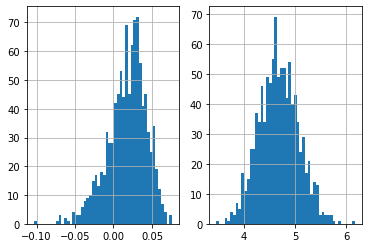

In [6]:
# R2 (left) and MSE (right) for model with 4 bin RGB distribution (1000 samples)



from matplotlib import pyplot

fig, axes = plt.subplots(1, 2)

pd.Series(r2_lst).hist(ax=axes[0], bins = 50)
pd.Series(mse_lst).hist(ax=axes[1], bins = 50)

In [237]:
np.mean(r2_lst)

0.016909737864573938

In [42]:
#100 sample models without rgb distribution  



mse_lst = []
r2_lst = []
for i in range(100):
    cmodel = pd.read_csv('cmodel_4bins.csv').sample(frac=1)
    X = cmodel[['train', 'truck', 'car',  'potted plant', 'person']]
    y = cmodel['Wealth_Index']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The coefficients
    #print('Coefficients: \n', regr.coef_)
    # The mean squared error
    mse_lst.append(mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    r2_lst.append(r2_score(y_test, y_pred))

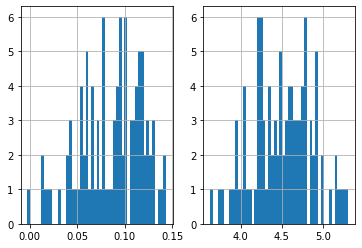

In [43]:
# R2 (left) and MSE (right) for model without RGB distribution (100 samples)

fig, axes = plt.subplots(1, 2)

pd.Series(r2_lst).hist(ax=axes[0], bins = 50)
pd.Series(mse_lst).hist(ax=axes[1], bins = 50)

In [45]:
np.mean(r2_lst)

0.0860512826524708

In [160]:
X_test.shape

(300, 29)

In [52]:
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [55]:
lr = LinearRegression().fit(X_train, y_train)
# get cross val scores
get_cv_scores(lr)

CV Mean:  0.09270936054593464
STD:  0.04799441929498885




In [56]:
# Train model with default alpha=1
ridge = Ridge(alpha=1).fit(X_train, y_train)
# get cross val scores
get_cv_scores(ridge)


CV Mean:  0.09301870813336785
STD:  0.047747871573567836




In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds = 5):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(1, 15)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

In [239]:
X = cmodel[['train', 'truck', 'car',  'potted plant', 'person']]
y = cmodel['Poor_MPI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
params = dtree_grid_search(X,y)
clf = DecisionTreeClassifier(criterion = params['criterion'], max_depth = params['max_depth'])

In [240]:
dtree_grid_search(X,y)

{'criterion': 'entropy', 'max_depth': 8}

In [200]:
cross_val_score(clf, X, y, cv=5)

array([0.59583333, 0.59583333, 0.6       , 0.55833333, 0.5875    ])

In [132]:
X = cmodel[['train', 'truck', 'car',  'potted plant', 'person']]
y = cmodel['Wealth_Index']
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
#pred = regressor.predict(X_test)
regressor.score(X_test, y_test)

-0.2687826081689919

In [133]:
cross_val_score(regressor, X, y)

array([-0.10406374, -0.11904083, -0.40967795, -0.21874516, -0.31447792])

In [134]:
def regressor(indep, dep, n = 100):
    for i in range(n):
        X = cmodel[indep]
        y = cmodel[dep]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
        # Create linear regression object
        regr = linear_model.LinearRegression()
        # Train the model using the training sets
        regr.fit(X_train, y_train)
        # Make predictions using the testing set
        y_pred = regr.predict(X_test)
        # The mean squared error
        mse_lst.append(mean_squared_error(y_test, y_pred))
        # The coefficient of determination: 1 is perfect prediction
        r2_lst.append(r2_score(y_test, y_pred))
    return np.mean(r2_lst), np.std(r2_lst), np.mean(mse_lst), np.std(mse_lst)

In [135]:
both = r_cols+g_cols+b_cols + ['train', 'truck', 'car',  'potted plant', 'person']
rgb = r_cols+g_cols+b_cols
objects = ['train', 'truck', 'car',  'potted plant', 'person']

In [136]:
regressor(both, 'Wealth_Index')

(0.03358310169265703,
 0.05131213685975695,
 2194145541.0776043,
 4603981421.451242)

In [137]:
dependants = cmodel[['total_income_2_b', 'total_deprivations',
       'Wealth_Index', 'total_deprivations_2', 'Poor_MPI', 'Severely_Poor_MPI']]

In [138]:
cont = ['total_income_2_b', 'total_deprivations',
       'Wealth_Index']
both_lst = [regressor(both, i) for i in cont]
rgb_lst = [regressor(rgb, i) for i in cont]
objects_lst = [regressor(objects, i) for i in cont]

In [139]:
d = {'rgb_mean_r2' : [x[0] for x in rgb_lst] , 'rgb_std_r2' : [x[1] for x in rgb_lst], 'rgb_mean_mse' : [x[2] for x in rgb_lst], 
    'rgb_std_mse' : [x[3] for x in rgb_lst], 'objects_mean_r2' : [x[0] for x in objects_lst] , 'objects_std_r2' : [x[1] for x in objects_lst], 'objects_mean_mse' : [x[2] for x in objects_lst], 
    'objects_std_mse' : [x[3] for x in objects_lst], 'both_mean_r2' : [x[0] for x in both_lst] , 'both_std_r2' : [x[1] for x in both_lst], 'both_mean_mse' : [x[2] for x in both_lst], 
    'both_std_mse' : [x[3] for x in both_lst] }



In [140]:
scores = pd.DataFrame(data = d, index = cont)

In [141]:
scores

,rgb_mean_r2,rgb_std_r2,rgb_mean_mse,rgb_std_mse,objects_mean_r2,objects_std_r2,objects_mean_mse,objects_std_mse,both_mean_r2,both_std_r2,both_mean_mse,both_std_mse
total_income_2_b,0.033849,0.051108,2.715217e+09,5.030795e+09,0.031191,0.050685,2.860112e+09,5.161713e+09,0.032026,0.051033,2.568022e+09,4.920750e+09
total_deprivations,0.033063,0.050493,2.630367e+09,4.974051e+09,0.030261,0.050249,2.778395e+09,5.109705e+09,0.031324,0.050283,2.479470e+09,4.857817e+09
Wealth_Index,0.033429,0.049765,2.550658e+09,4.918817e+09,0.031833,0.050412,2.701217e+09,5.058884e+09,0.034259,0.051903,2.396821e+09,4.796861e+09


In [142]:
def dtree(indep, dep):
    X = cmodel[indep]
    y = cmodel[dep]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
    params = dtree_grid_search(X,y)
    clf = DecisionTreeClassifier(criterion = params['criterion'], max_depth = params['max_depth'])
    s = cross_val_score(clf, X, y, cv=5)
    return np.mean(s), np.std(s), max(y.value_counts(normalize = True))

In [143]:
dtree(objects, 'Poor_MPI')

(0.572380748051205, 0.014849657306784576, 0.5639288738357324)

In [144]:
cats = ['total_deprivations_2', 'Poor_MPI', 'Severely_Poor_MPI']

cat_both_lst = [dtree(both, i) for i in cats]
cat_rgb_lst = [dtree(rgb, i) for i in cats]
cat_objects_lst = [dtree(objects, i) for i in cats]

In [145]:
d = {'rgb_mean_cv' : [x[0] for x in cat_rgb_lst] , 'rgb_std_cv' : [x[1] for x in cat_rgb_lst], 
     'objects_mean_cv' : [x[0] for x in cat_objects_lst] , 'objects_std_cv' : [x[1] for x in cat_objects_lst], 
     'both_mean_cv' : [x[0] for x in cat_both_lst] , 'both_std_cv' : [x[1] for x in cat_both_lst], 'baseline' : [x[2] for x in cat_both_lst]}



In [146]:
cat_score = pd.DataFrame(data = d, index = cats)

In [147]:
cat_score.columns

Index(['rgb_mean_cv', 'rgb_std_cv', 'objects_mean_cv', 'objects_std_cv',
       'both_mean_cv', 'both_std_cv', 'baseline'],
      dtype='object')

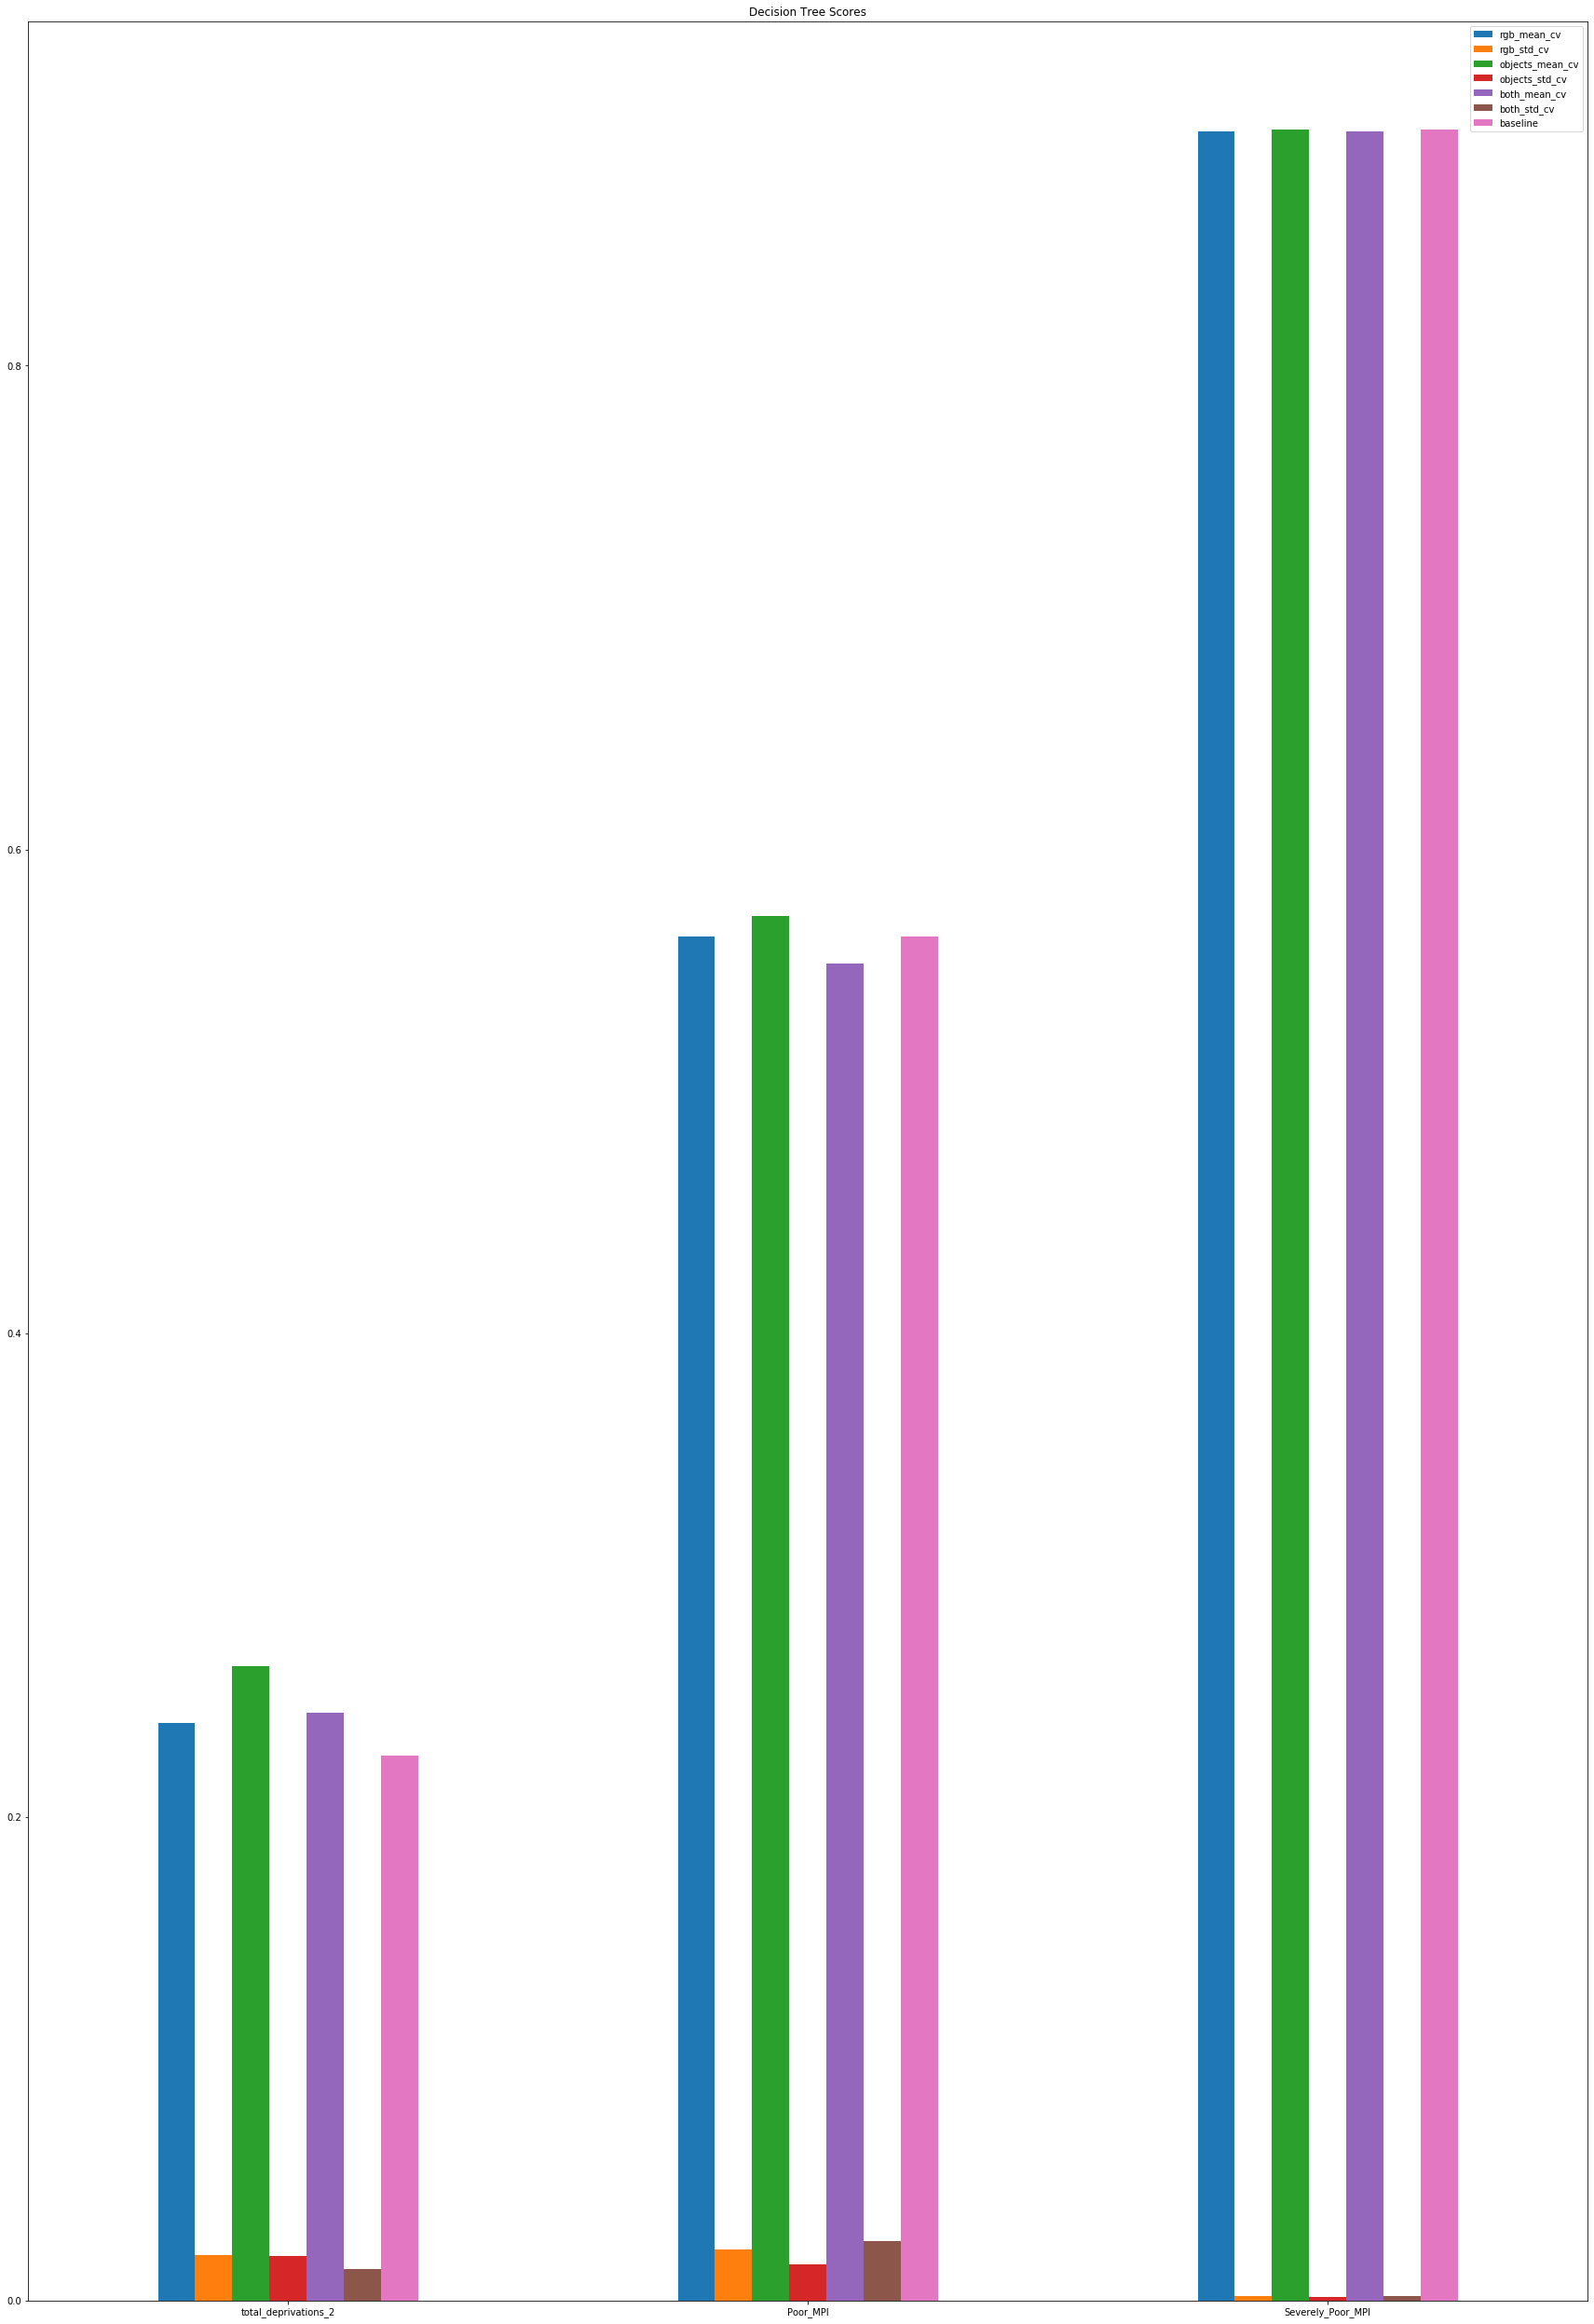

In [171]:
ax = cat_score.plot.bar(rot=0, figsize = (30, 45), title = 'Decision Tree Scores')
fig = ax.get_figure()
fig.savefig('dtree_score')

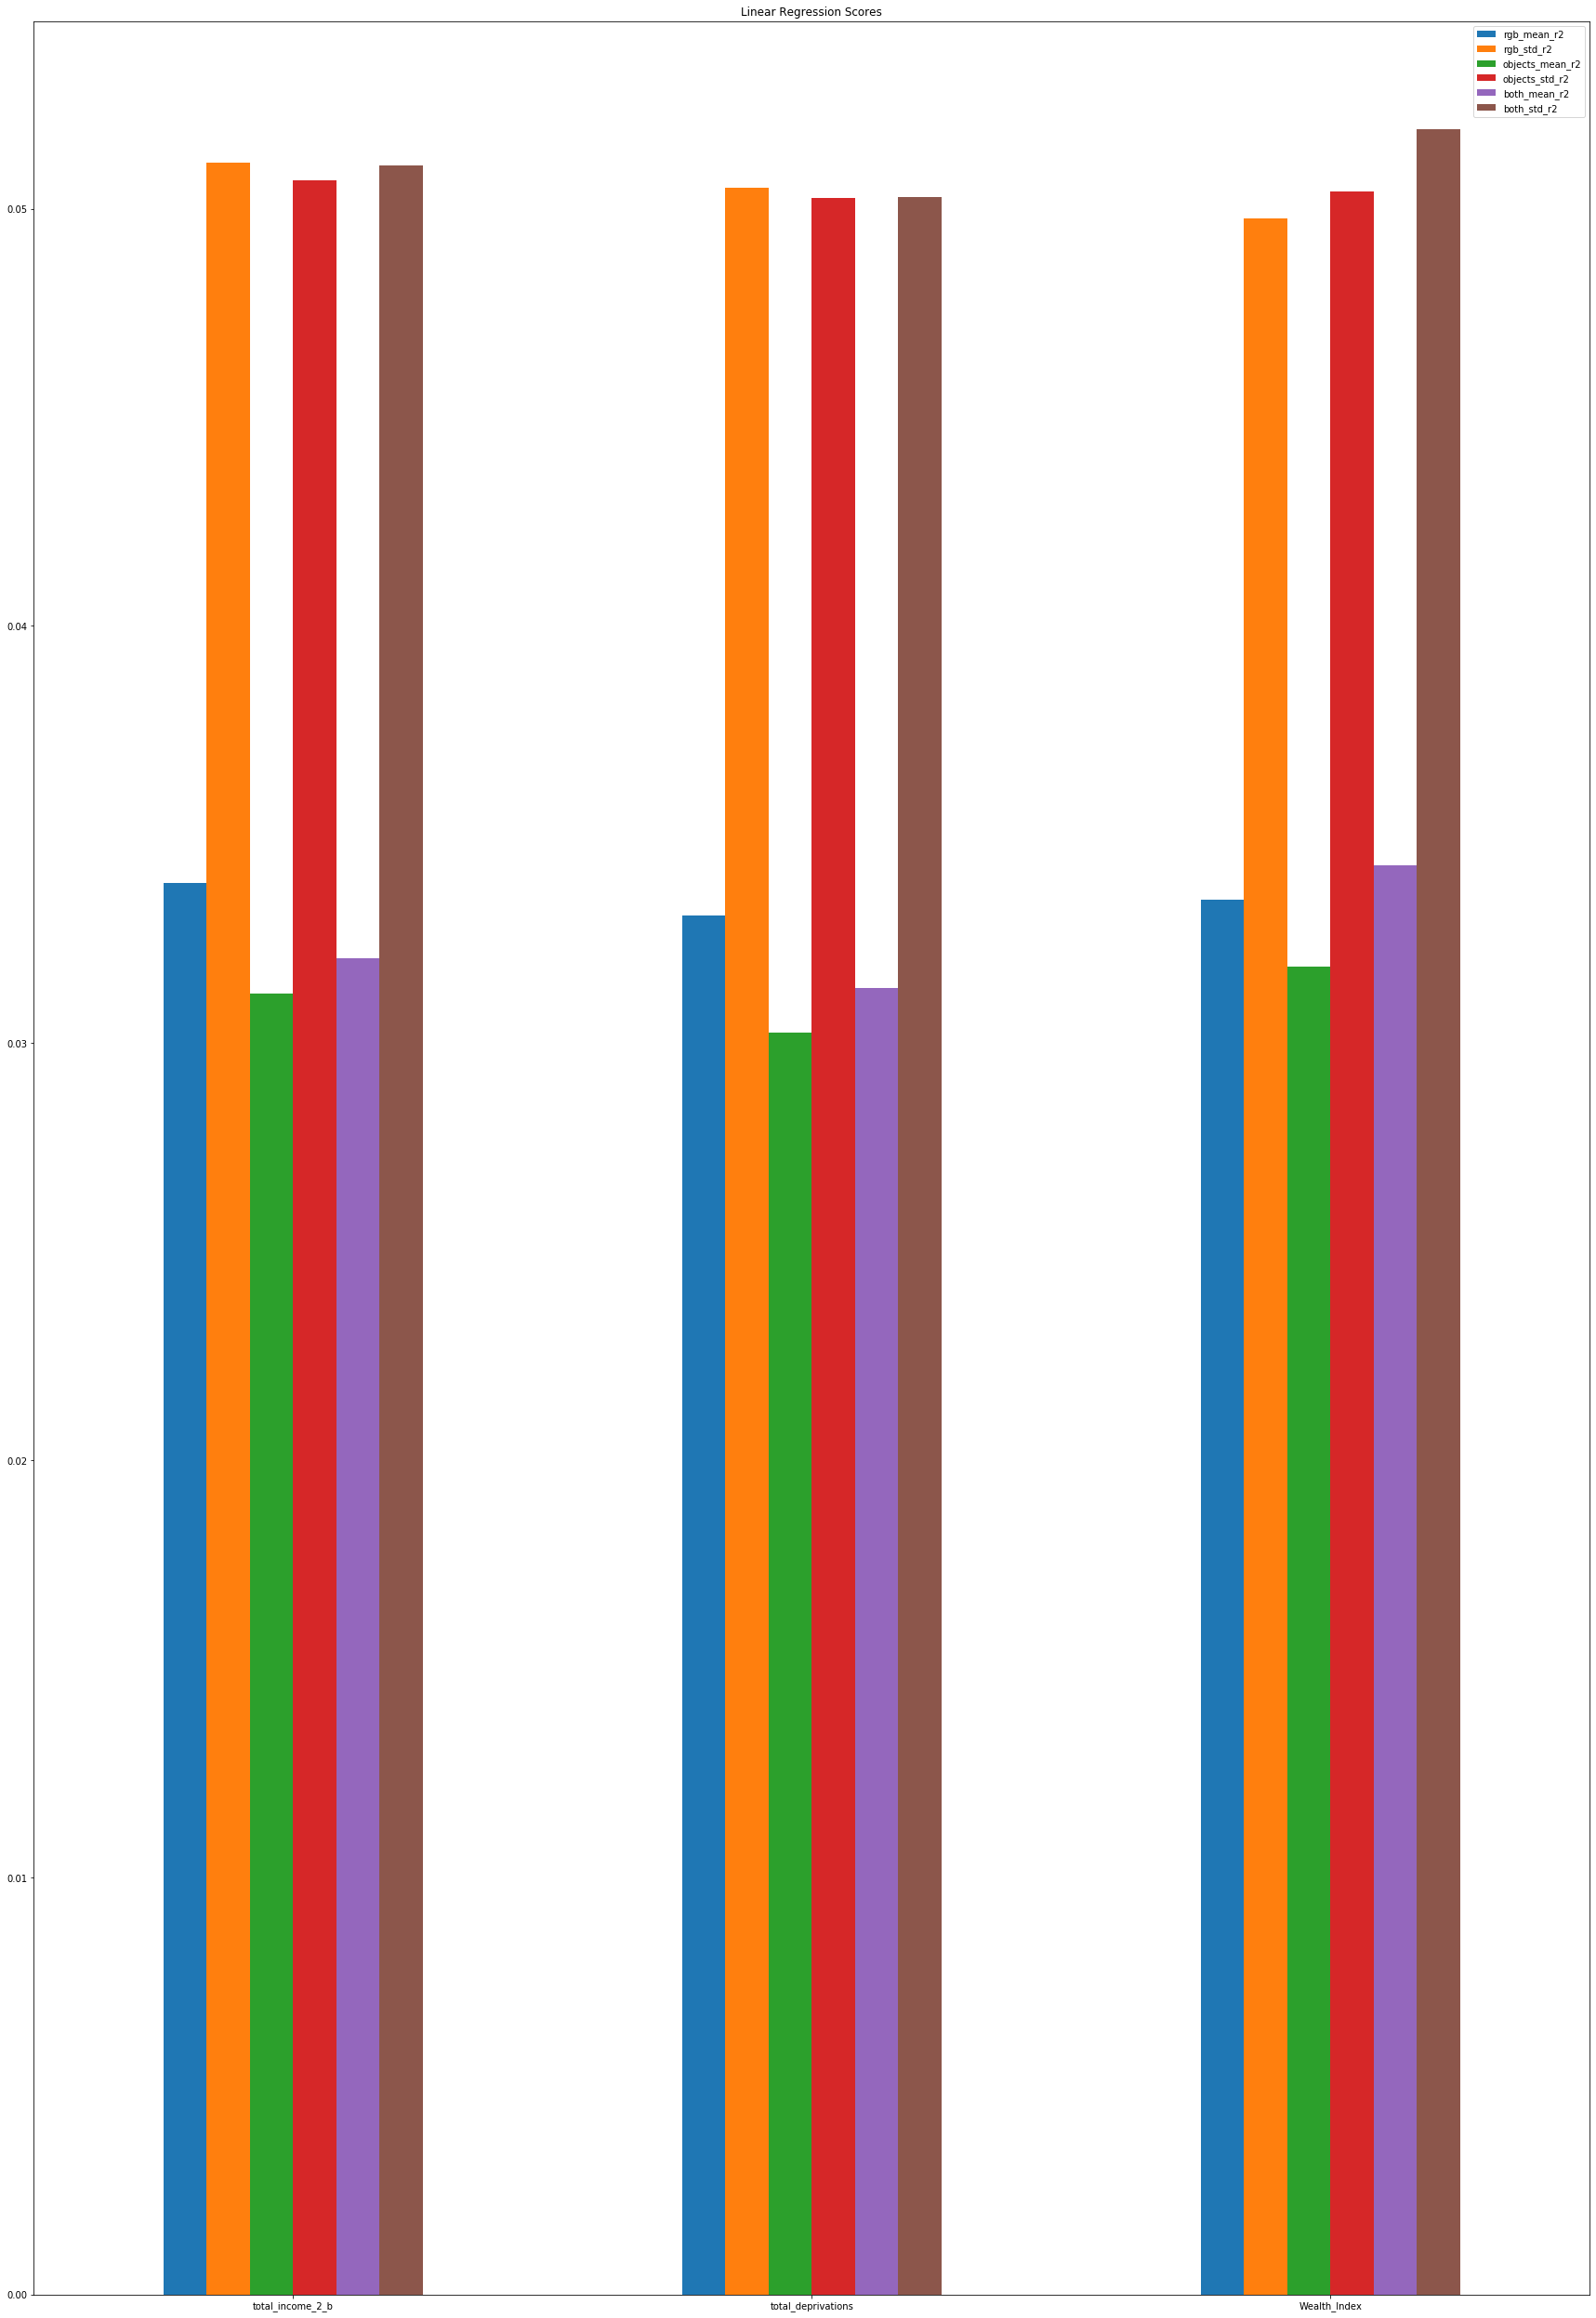

In [172]:
ax = scores[['rgb_mean_r2', 'rgb_std_r2',
       'objects_mean_r2', 'objects_std_r2', 'both_mean_r2', 'both_std_r2']].plot.bar(rot=0, figsize = (30, 45), title = 'Linear Regression Scores')
fig = ax.get_figure()
fig.savefig('linreg_score')

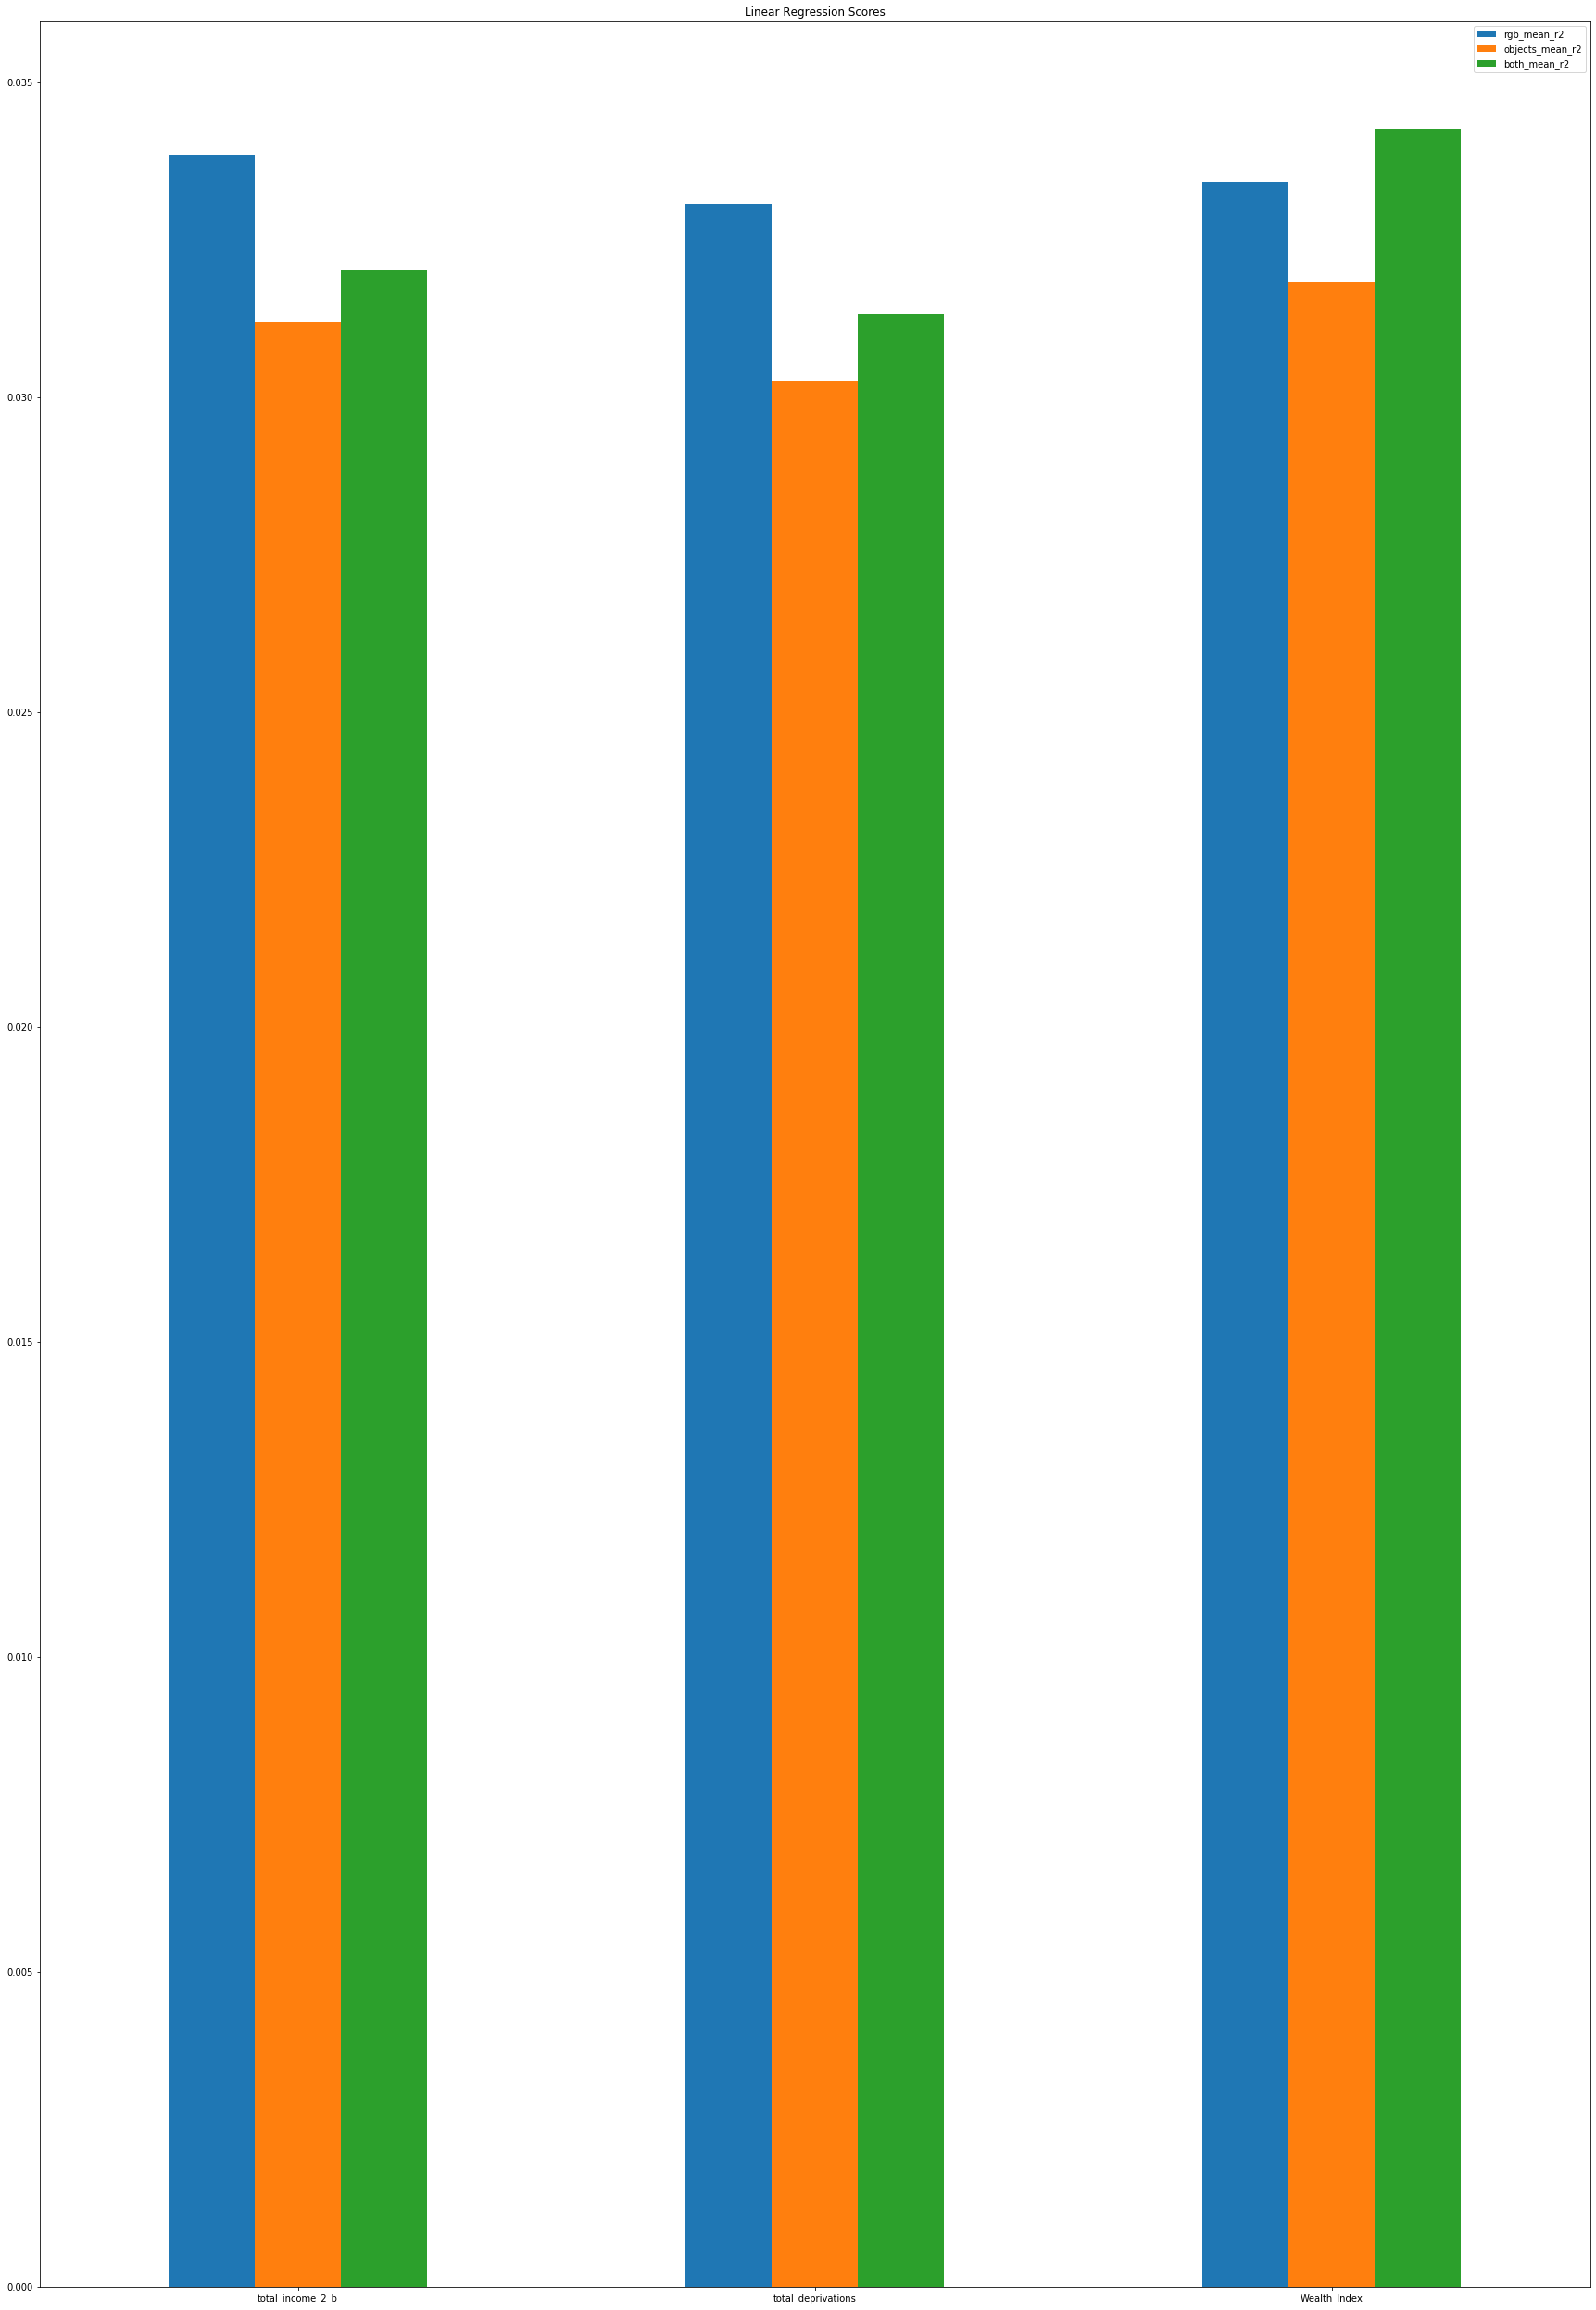

In [173]:
ax = scores[['rgb_mean_r2', 'objects_mean_r2', 'both_mean_r2']].plot.bar(rot=0, figsize = (30, 45), title = 'Linear Regression Scores')
fig = ax.get_figure()
fig.savefig('linreg_score_r2')

In [82]:
#!pip install cufflinks
import cufflinks as cf


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [129]:
#Create KNN Object.
knn = KNeighborsClassifier()
#Create x and y variables.
x = cmodel[objects]
y = cmodel['Poor_MPI'] == 'Poor'
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)
#Training the model.
knn.fit(x_train, y_train)
#Predict test data set.
y_pred = knn.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

       False       0.43      0.25      0.32       102
        True       0.57      0.74      0.64       135

    accuracy                           0.53       237
   macro avg       0.50      0.50      0.48       237
weighted avg       0.51      0.53      0.50       237



0.4978213507625272

In [196]:
def knn(indep, dep):
    X = cmodel[indep]
    y = cmodel[dep]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
    leaf_size = list(range(1,15, 2))
    n_neighbors = list(range(1,20, 2))
    p=[1,2]
    #Convert to dictionary
    hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
    #Create new KNN object
    knn_2 = KNeighborsClassifier()
    #Use GridSearch
    clf = GridSearchCV(knn_2, hyperparameters, cv=10)
    #Fit the model
    best_model = clf.fit(X,y)
    #Print The value of best Hyperparameters
    d = dict()
    d['Best leaf_size:'] = best_model.best_estimator_.get_params()['leaf_size']
    d['Best p:'] = best_model.best_estimator_.get_params()['p']
    d['Best n_neighbors:'] = best_model.best_estimator_.get_params()['n_neighbors']
    s = cross_val_score(best_model, X, y, cv=5)
    return np.mean(s), np.std(s), max(y.value_counts(normalize = True)), d

    

In [192]:
%%time
knn(both, 'Poor_MPI')

CPU times: user 2min 57s, sys: 1.96 s, total: 2min 59s
Wall time: 3min 13s


(0.5359615247085746,
 0.02234845626805584,
 0.5639288738357324,
 {'Best leaf_size:': 1, 'Best p:': 2, 'Best n_neighbors:': 19})

In [197]:
%%time
knn_both_lst = [knn(both, i) for i in cats]
knn_rgb_lst = [knn(rgb, i) for i in cats]
knn_objects_lst = [knn(objects, i) for i in cats]

CPU times: user 11min 28s, sys: 5.83 s, total: 11min 34s
Wall time: 11min 55s


In [199]:
d = {'rgb_mean_cv' : [x[0] for x in knn_rgb_lst] , 'rgb_std_cv' : [x[1] for x in knn_rgb_lst],
     'best parameters' : [x[3] for x in knn_rgb_lst],
     'objects_mean_cv' : [x[0] for x in knn_objects_lst] , 'objects_std_cv' : [x[1] for x in knn_objects_lst],
     'best parameters' : [x[3] for x in knn_objects_lst],
     'both_mean_cv' : [x[0] for x in knn_both_lst] , 'both_std_cv' : [x[1] for x in knn_both_lst],
     'best parameters' : [x[3] for x in knn_both_lst],'baseline' : [x[2] for x in knn_both_lst]}



In [200]:
knn_scores = pd.DataFrame(data = d, index = cats)

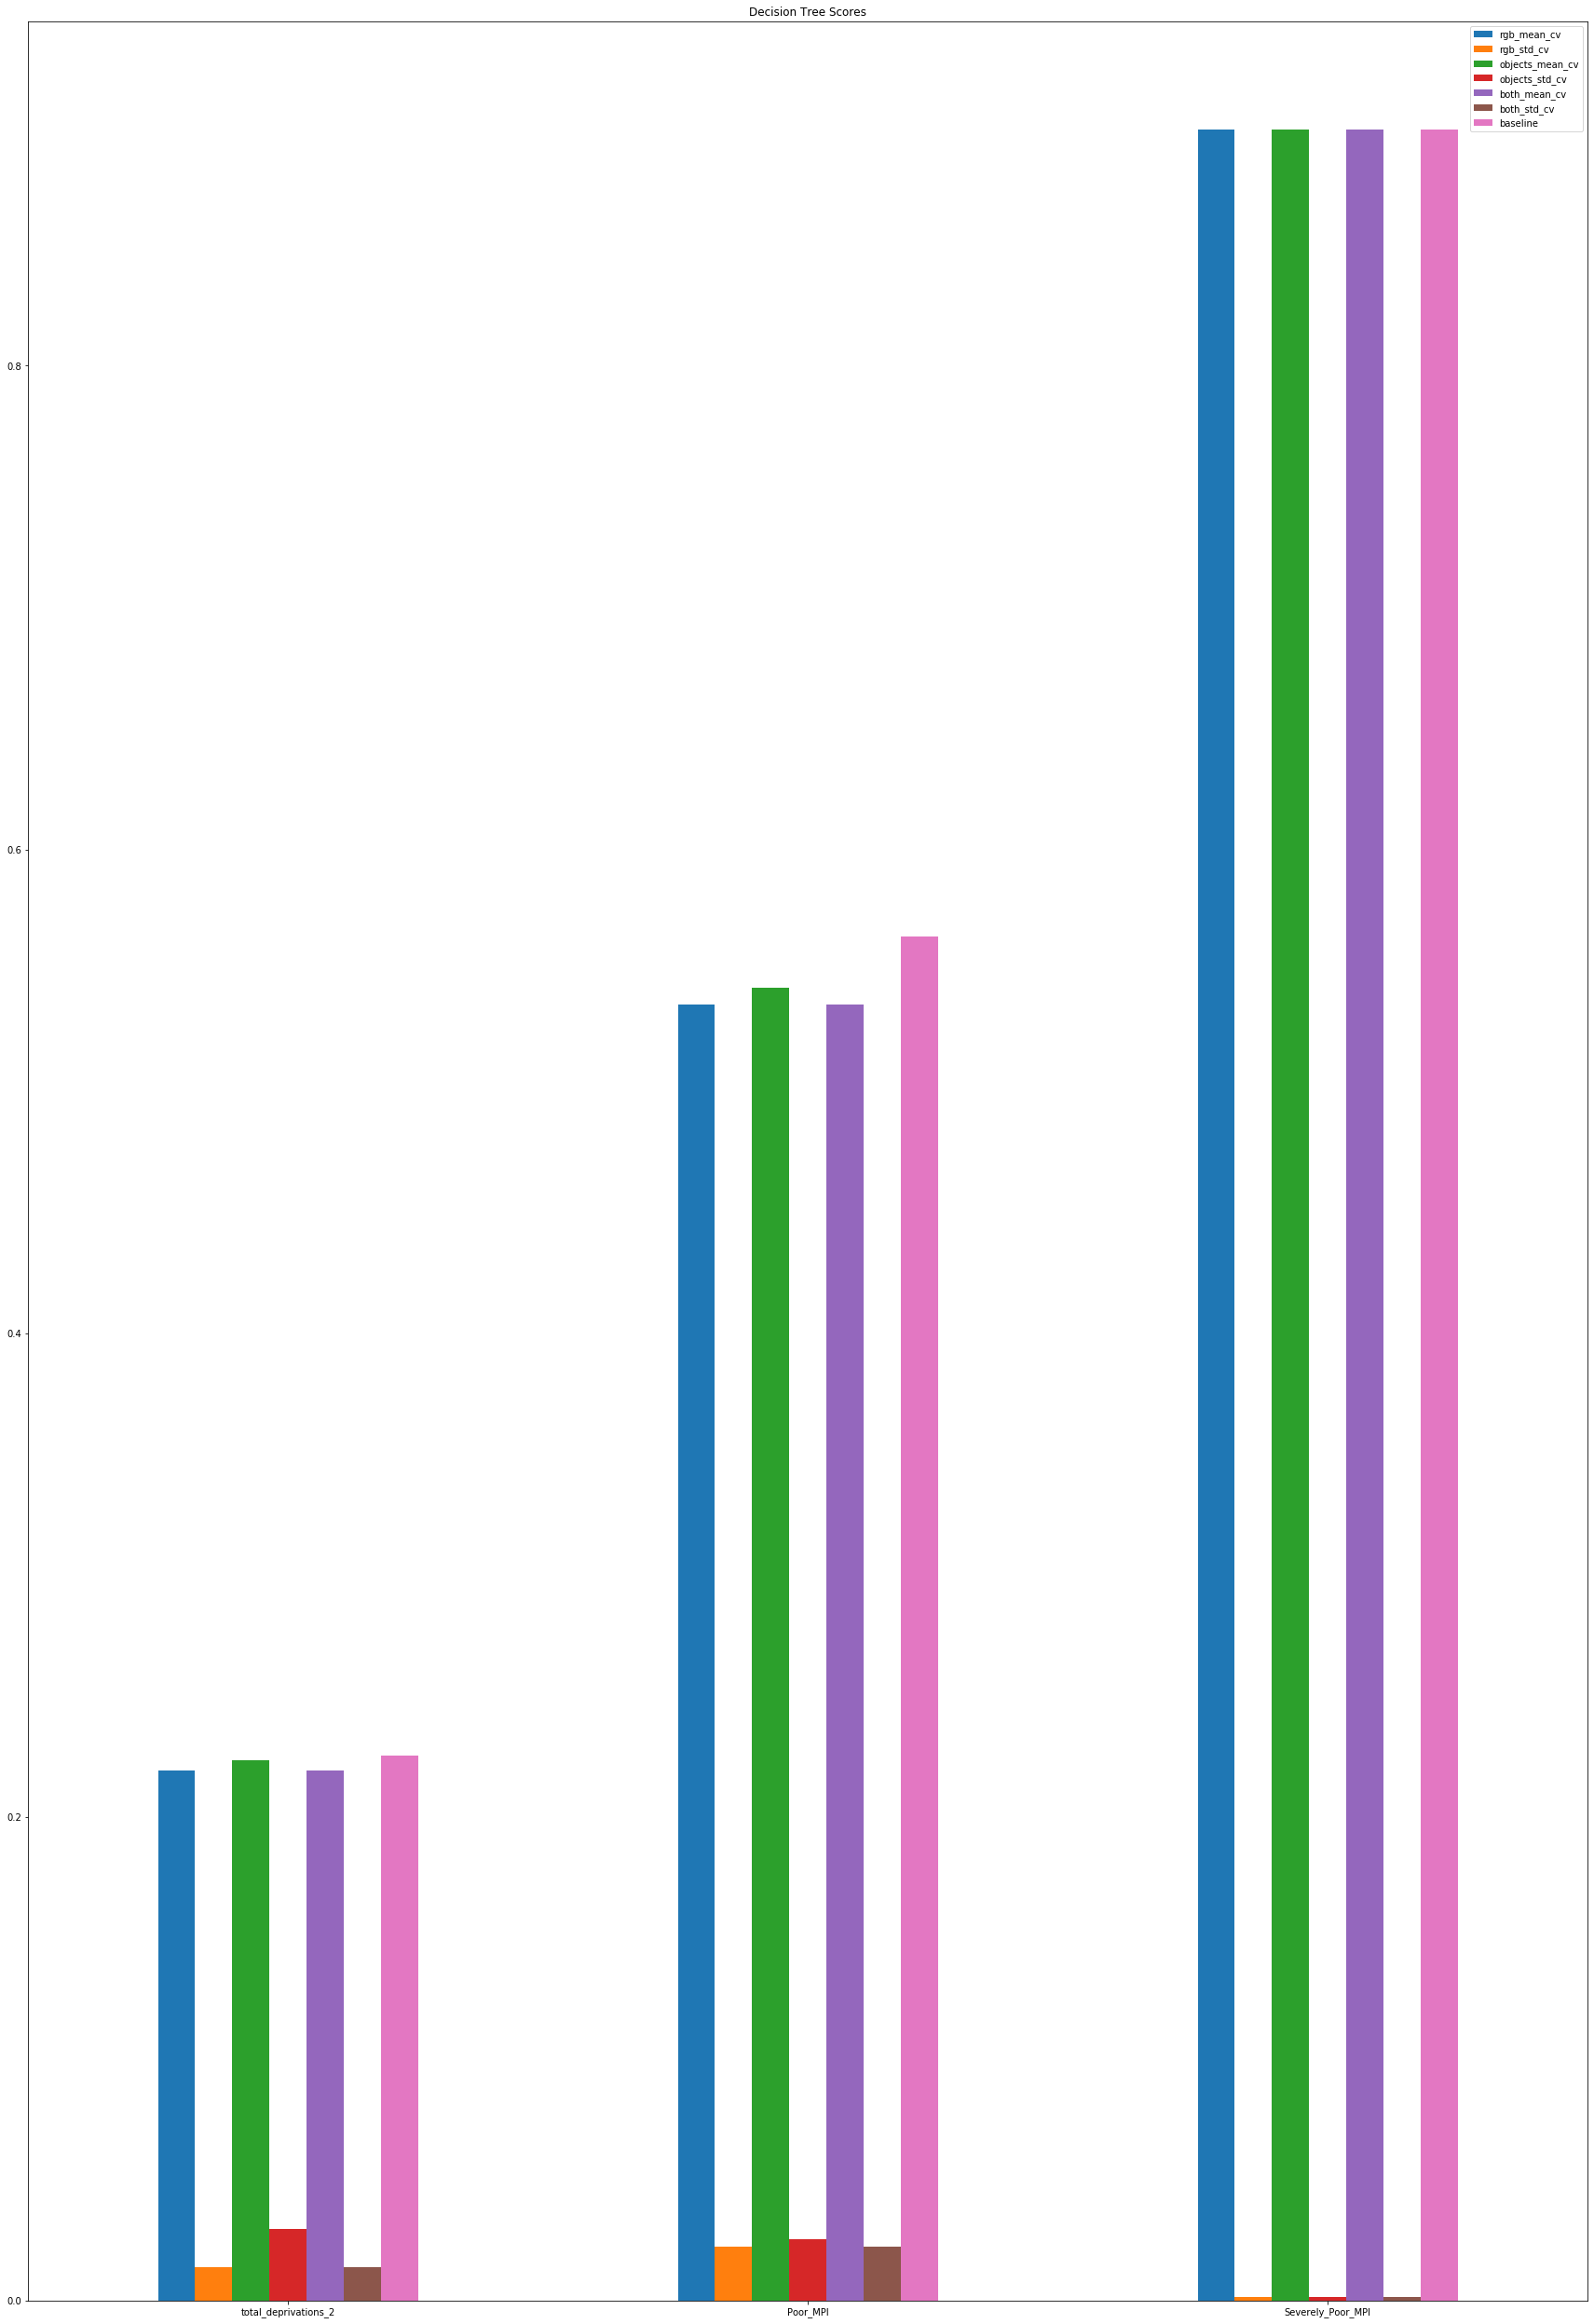

In [201]:
ax = knn_scores[['rgb_mean_cv', 'rgb_std_cv',
       'objects_mean_cv', 'objects_std_cv', 'both_mean_cv', 'both_std_cv', 'baseline']].plot.bar(rot=0, figsize = (30, 45), title = 'Decision Tree Scores')
fig = ax.get_figure()
fig.savefig('knn_scores')

In [202]:
scores.to_csv('regression_scores.csv')
cat_score.to_csv('Dtree_scores.csv')
knn_scores.to_csv('knn_scores.csv')

In [203]:
knn_scores

,rgb_mean_cv,rgb_std_cv,best parameters,objects_mean_cv,objects_std_cv,both_mean_cv,both_std_cv,baseline
total_deprivations_2,0.219288,0.013710,"{'Best leaf_size:': 1, 'Best p:': 2, 'Best n_n...",0.223557,0.029648,0.219288,0.013710,0.225233
Poor_MPI,0.535962,0.022348,"{'Best leaf_size:': 1, 'Best p:': 2, 'Best n_n...",0.542763,0.025512,0.535962,0.022348,0.563929
Severely_Poor_MPI,0.897547,0.001516,"{'Best leaf_size:': 1, 'Best p:': 1, 'Best n_n...",0.897547,0.001516,0.897547,0.001516,0.897544


In [245]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X = cmodel[objects]
y = cmodel['Severely_Poor_MPI']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=1000,  solver = 'lbfgs').fit(X, y)
clf.predict_proba(X_test[:1])
np.mean(cross_val_score(clf, X, y, cv=10))

/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_

0.8738570004272896

In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)
clf.score(X, y)